In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from subject_clf.dataset_imperial import dataset, subjects, short_term_weights_path
from subject_clf.subject_net import SubjectNet
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import itertools
from common.quaternion import *
from math import pi
from tqdm import tqdm
torch.cuda.set_device(1)


In [2]:
from long_term.dataset_imperial import dataset, long_term_weights_path
from long_term.locomotion_utils import build_extra_features, compute_splines
from long_term.pose_network_long_term import  PoseNetworkLongTerm
from common.spline import Spline

if torch.cuda.is_available():
    dataset.cuda()
dataset.compute_euler_angles('yzx')
dataset.compute_positions()
build_extra_features(dataset)

from long_term.pace_network import PaceNetwork

traj = np.array([[-i*0.1,0] for i in range(1737)])
pace_net = PaceNetwork()
pace_net.load_weights('weights_pace_network.bin')
spline = Spline(traj, closed=False)

Loading weights from weights_pace_network.bin


# parameters: 9545250
Loading weights from weights_long_term.bin


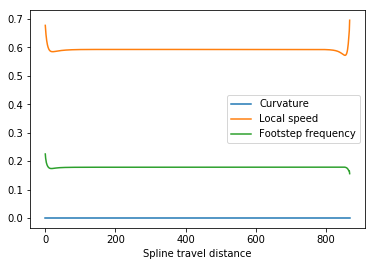

In [3]:
# We want the character to walk
%matplotlib inline
spline_walk = pace_net.predict(spline, average_speed=0.5)
plt.plot(spline_walk.get_track('curvature'))
plt.plot(spline_walk.get_track('amplitude'))
plt.plot(spline_walk.get_track('frequency'))
plt.legend(['Curvature', 'Local speed', 'Footstep frequency'])
_ = plt.xlabel('Spline travel distance')

model = PoseNetworkLongTerm(32, dataset.skeleton())
if torch.cuda.is_available():
    model.cuda()
model.load_weights('weights_long_term.bin') # Load pretrained model

In [26]:
traj = np.array([[i,0] for i in range(1000)])
spline = Spline(traj, closed=False)
spline_walk = pace_net.predict(spline, average_speed=0.5)

spline_walk.tracks['direction'][0][:,0] = 1
spline_walk.tracks['direction'][0][:,1] = 1

%matplotlib notebook
prediction, rotations = model.generate_motion(spline_walk, dataset['Subject4']['walking_2_d1'])
anim = render_animation_dual(dataset['Subject4']['walking_2_d1']['positions_world'][model.prefix_length:],
                             prediction, dataset.skeleton(), dataset.fps(), output='interactive')

1684 frames generated in 1.657 seconds (1016.15 FPS)


NameError: name 'render_animation_dual' is not defined

In [27]:
%matplotlib notebook

zoom_right_arm = [-0/10,2/10,-3/10,-1/10,3/10,5/10]
zoom_left_foot = [-0.8/10,1.2/10,1/10,3/10,0/10,2/10]

prediction_test = prediction.copy()
for i in range(prediction_test.shape[0]):
    v = np.array(prediction_test[i,:,:])
    #q = np.array([[0,0,1,0] for _ in range(v.shape[0])])
    q = np.tile(euler_to_quaternion(np.array([[0,-pi/6.5,0]]),'zyx'),(27,1))
    prediction_test[i] = qrot_np(q,v)
anim = render_animation_dual(dataset['Subject4']['walking_2_d1']['positions_world'][model.prefix_length:][:],
                             prediction_test[:], dataset.skeleton(), dataset.fps(), output='interactive')

RuntimeError: Expected object of type torch.DoubleTensor but found type torch.FloatTensor for argument #2 'other'

In [24]:
%matplotlib notebook

zoom_right_arm = [-0/10,2/10,-3/10,-1/10,3/10,5/10]
zoom_left_foot = [-0.8/10,1.2/10,1/10,3/10,0/10,2/10]

prediction_test = prediction.copy()
for i in range(prediction_test.shape[0]):
    v = np.array(prediction_test[i,:,:])
    #q = np.array([[0,0,1,0] for _ in range(v.shape[0])])
    q = np.tile(euler_to_quaternion(np.array([[0,-pi/6.5,0]]),'zyx'),(27,1))
    prediction_test[i] = qrot_np(q,v)
anim = render_animation_dual(dataset['Subject4']['walking_2_d1']['positions_world'][model.prefix_length:][10:200:10],
                             prediction_test[10:200:10], dataset.skeleton(), dataset.fps(), output='test.gif')

RuntimeError: Expected object of type torch.DoubleTensor but found type torch.FloatTensor for argument #2 'other'

In [23]:
prediction_test = prediction.copy()
#for i in range(prediction_test.shape[0]):
#    v = np.array(prediction_test[i,:,:])
#    #q = np.array([[0,0,1,0] for _ in range(v.shape[0])])
#    q = np.tile(euler_to_quaternion(np.array([[0,-pi/6.5,0]]),'zyx'),(27,1))
#    prediction_test[i] = qrot_np(q,v)
anim = render_animation(prediction_test[10:200:10], dataset.skeleton(), dataset.fps(), output='test.gif',grid=False)

NameError: name 'render_animation' is not defined

In [22]:
prediction_test = prediction.copy()
for i in range(prediction_test.shape[0]):
    v = np.array(prediction_test[i,:,:])
    #q = np.array([[0,0,1,0] for _ in range(v.shape[0])])
    q = np.tile(euler_to_quaternion(np.array([[0,-pi/6.5,0]]),'zyx'),(27,1))
    prediction_test[i] = qrot_np(q,v)
anim = render_animation(prediction_test[10:200:10], dataset.skeleton(), dataset.fps(), output='interactive',grid=False)


RuntimeError: Expected object of type torch.DoubleTensor but found type torch.FloatTensor for argument #2 'other'

In [16]:
anim = render_animation(dataset['Subject4']['walking_2_d1']['positions_world'][model.prefix_length:][10:200:10], dataset.skeleton(), dataset.fps(), output='test.gif',grid=False)

In [10]:
from importlib import reload
import common.visualization_patrick as cv
cv = reload(cv)

In [11]:
%matplotlib notebook

zoom_right_arm = [-0/10,2/10,-3/10,-1/10,3/10,5/10]
zoom_left_foot = [-0.8/10,1.2/10,1/10,3/10,0/10,2/10]

prediction_test = prediction.copy()
for i in range(prediction_test.shape[0]):
    v = np.array(prediction_test[i,:,:])
    #q = np.array([[0,0,1,0] for _ in range(v.shape[0])])
    q = np.tile(euler_to_quaternion(np.array([[0,-pi/6.5,0]]),'zyx'),(27,1))
    prediction_test[i] = qrot_np(q,v)
anim = cv.render_animation(prediction_test[10:100], dataset.skeleton(), dataset.fps(),zoom = zoom_right_arm, output='arm_lines.gif',grid=False,joints = [9,21],data2=dataset['Subject4']['walking_2_d1']['positions_world'][model.prefix_length:][20:110])


In [12]:
plt.show()

In [162]:
tl

Text(0,100,'$\\mathdefault{10^{2}}$')

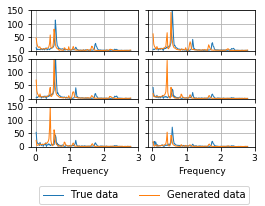

In [232]:
%matplotlib inline
plt.figure(figsize=(4,3))
axes = []

joints = [4,8,10,19,20,24]
joint_axes = [0,0,0,0,0,0]

npt = 800
chunk_gen = prediction_test.reshape(-1,27*3)[:npt]
chunk_dat = dataset['Subject4']['walking_2_d0']['positions_world'][model.prefix_length+10:model.prefix_length+npt+10].reshape(-1,27*3)
fft_gen = np.fft.rfft(chunk_gen, axis=0)
fft_dat = np.fft.rfft(chunk_dat, axis=0)
freqs = np.fft.rfftfreq(npt, 1/dataset.fps())


plt.subplots_adjust(wspace=0.1, hspace=0.2, bottom=0.25)
for i in range(6):
    ax = plt.subplot(3,2,i+1)
    axes.append(ax)
    ji = joints[i]*3 + joint_axes[i]
    
    nkeep = 150
    h1 = ax.plot(freqs[1:nkeep],np.abs(fft_dat[1:nkeep,ji]), linewidth=1)[0]
    h2 = ax.plot(freqs[1:nkeep],np.abs(fft_gen[1:nkeep,ji]), linewidth=1)[0]
    
    ax.set_xticks(range(0,4,1))
    if i == 4 or i == 5:
        ax.set_xticklabels(range(0,4,1), fontsize=9)
        ax.set_xlabel('Frequency', fontsize=9)
    else:
        ax.set_xticklabels([])
        
    ax.set_ylim([1e-2,150])
    #ax.set_yticks([1e-2,1e0,1e2])
    if i in [0,2,4]:
        for tl in ax.get_yticklabels():
            tl.set_fontsize(9)
    else:
        ax.set_yticklabels([])
    ax.grid()
        
plt.figlegend([h1,h2], ['True data', 'Generated data'], 'lower center', ncol=2, bbox_to_anchor=(0.5,-0.015))


plt.savefig('spectra-ex-curves.pdf', bbox_inches='tight')

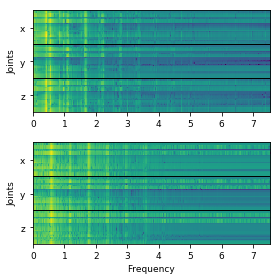

In [142]:
npt = 800
chunk_gen = prediction_test.reshape(-1,27*3)[:npt]
chunk_dat = dataset['Subject4']['walking_2_d0']['positions_world'][model.prefix_length+10:model.prefix_length+npt+10].reshape(-1,27*3)
fft_gen = np.fft.rfft(chunk_gen, axis=0)
fft_dat = np.fft.rfft(chunk_dat, axis=0)
freqs = np.fft.rfftfreq(npt, 1/dataset.fps())

%matplotlib inline
plt.figure(figsize=(4,4))

ax1 = plt.subplot(211)
fft_gen_disp = np.hstack([fft_gen[1:,3::3],fft_gen[1:,4::3],fft_gen[1:,5::3]])
plt.imshow(np.log(np.abs(fft_gen_disp.T)), aspect='auto')
ax1.set_xticks(range(0,400,53))
ax1.set_xticklabels(range(10), fontsize=9)
ax1.set_yticks([13,26+13,52+13])
ax1.set_yticklabels(['x','y','z'], fontsize=9)
ax1.set_ylabel("Joints", fontsize = 9)
plt.plot([0,400-1],[26-0.5,26-0.5],'k', linewidth=1)
plt.plot([0,400-1],[52-0.5,52-0.5],'k', linewidth=1)

ax2 = plt.subplot(212)
fft_dat_disp = np.hstack([fft_dat[1:,3::3],fft_dat[1:,4::3],fft_dat[1:,5::3]])
plt.imshow(np.log(np.abs(fft_dat_disp.T)), aspect='auto')
ax2.set_xticks(range(0,400,53))
ax2.set_xticklabels(range(10), fontsize=9)
ax2.set_xlabel("Frequency", fontsize = 9)
ax2.set_ylabel("Joints", fontsize = 9)
plt.plot([0,400-1],[26-0.5,26-0.5],'k', linewidth=1)
plt.plot([0,400-1],[52-0.5,52-0.5],'k', linewidth=1)
ax2.set_yticks([13,26+13,52+13])
ax2.set_yticklabels(['x','y','z'], fontsize=9)

plt.tight_layout()

plt.savefig('spectra-ex.pdf')

#plt.subplot(313)
#plt.imshow(np.log(np.abs(np.abs(fft_dat[1:,3::3].T) - np.abs(fft_gen[1:,3::3].T))), aspect='auto')
#plt.colorbar()

In [55]:
fft_dat.shape

(401, 81)

In [64]:
plt.figure()
fft_dat

400

In [108]:
h1

In [6]:
def logspecdist(spec1, spec2):
    return np.sum(np.sqrt(np.sum(100*(np.log10(np.abs(spec1)/np.abs(spec2))**2), axis=0)))

In [5]:
nsubject = len(dataset.subjects())
npt = 800
D = np.zeros((2*nsubject,2*nsubject))

pred = [[] for _ in range(nsubject)]
chunk_gen = [[] for _ in range(nsubject)]
chunk_dat = [[] for _ in range(nsubject)]
fft_gen   = [[] for _ in range(nsubject)]
fft_dat   = [[] for _ in range(nsubject)]

for i, s1 in enumerate(tqdm(dataset.subjects())):
    
    pred[i] = model.generate_motion(spline_walk, dataset[s1]['walking_2_d0'], do_print=False)[0]
    for j in range(pred[i].shape[0]):
        v = np.array(pred[i][j,:,:])
        q = np.tile(euler_to_quaternion(np.array([[0,-pi/6.5,0]], dtype='float32'),'zyx'),(27,1))
        pred[i][j] = qrot_np(q,v)
    
    chunk_gen[i] = pred[i].reshape(-1,27*3)[:npt]
    chunk_dat[i] = dataset[s1]['walking_2_d0']['positions_world'][model.prefix_length:model.prefix_length+npt].reshape(-1,27*3)
    fft_gen[i] = np.fft.rfft(chunk_gen[i][:,3:], axis=0)
    fft_dat[i] = np.fft.rfft(chunk_dat[i][:,3:], axis=0)

for i, s1 in enumerate(tqdm(dataset.subjects())):
    for j, s2 in enumerate(dataset.subjects()):
        D[i,j] = logspecdist(fft_dat[i], fft_dat[j])
        D[i,j+nsubject] = logspecdist(fft_dat[i], fft_gen[j])
        D[i+nsubject,j] = logspecdist(fft_gen[i], fft_dat[j])
        D[i+nsubject,j+nsubject] = logspecdist(fft_gen[i], fft_gen[j])

  0%|          | 0/25 [00:00<?, ?it/s]


NameError: name 'logspecdist' is not defined

In [7]:
for i, s1 in enumerate(tqdm(dataset.subjects())):
    for j, s2 in enumerate(dataset.subjects()):
        D[i,j] = logspecdist(fft_dat[i], fft_dat[j])
        D[i,j+nsubject] = logspecdist(fft_dat[i], fft_gen[j])
        D[i+nsubject,j] = logspecdist(fft_gen[i], fft_dat[j])
        D[i+nsubject,j+nsubject] = logspecdist(fft_gen[i], fft_gen[j])

100%|██████████| 25/25 [00:04<00:00,  5.29it/s]


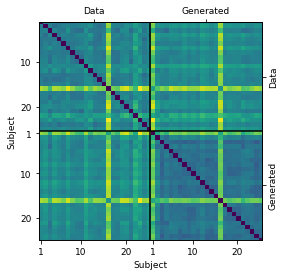

In [75]:
Dp = D
#to_remove = np.array([15])
#Dp = np.delete(Dp, nsubject+to_remove, 1)
#Dp = np.delete(Dp, to_remove, 1)
#Dp = np.delete(Dp, nsubject+to_remove, 0)
#Dp = np.delete(Dp, to_remove, 0)

%matplotlib inline
fig = plt.figure(figsize=(4,4))
plt.imshow(Dp)
plt.xlabel("Subject",fontsize=9)
plt.ylabel("Subject",fontsize=9)
ax = plt.gca()
ax.set_xticks([0,9,19,25+0,25+9,25+19])
ax.set_xticklabels([1,10,20,1,10,20], fontsize=9)
ax.set_yticks([0,9,19,25+0,25+9,25+19])
ax.set_yticklabels([1,10,20,1,10,20], fontsize=9)
plt.plot([25-0.5,25-0.5],[-0.5,50-0.5],'k-')
plt.plot([-0.5,50-0.5],[25-0.5,25-0.5],'k-')


ax2 = ax.twinx()
ax2.set_yticks([0.25,0.75])
ax2.set_yticklabels(['Generated', 'Data'], fontsize=9)
ax2.tick_params(labelrotation=90)
for tick in ax2.get_yticklabels():
    tick.set_verticalalignment('center')

ax3 = fig.add_axes((0.1245,0.88,0.775,0.0))
ax3.tick_params(labeltop=True, top=True, bottom=False, labelbottom=False, left=False)
ax3.set_yticks([])
ax3.set_xticks([0.25,0.75])
ax3.set_xticklabels(['Data', 'Generated'], fontsize=9)

plt.savefig('distmat.pdf', transparent=True)

In [76]:
tick.set_horizontalalignment

Text(1,0.25,'Data')